In [ ]:
from pyimagesearch.siamese_net import build_siamese_model
from pyimagesearch import siamese_net
from pyimagesearch import config
from pyimagesearch import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np

import importlib as rld



In [ ]:
# rld.reload(config)
# rld.reload(siamese_net)
# rld.reload(utils)
# from pyimagesearch.siamese_net import build_siamese_model
# print(config.IMG_SHAPE)
# print(config.EPOCHS)
# print(config.BATCH_SIZE)




In [ ]:
print(config.EPOCHS)
print(config.IMG_SHAPE)
print(config.BATCH_SIZE)

In [ ]:
# import random
# import numpy as np
# from tensorflow import keras
# import wandb
# #from wandb.keras import WandbCallback
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input, Dropout
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

In [3]:
import csv
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
trainX, testX, trainY, testY = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [7]:
print('train images shape',trainX.shape)
print('lables train',trainY.shape)
print('test images shape',testX.shape)
print('labels test',testY.shape)

train images shape (2829, 42)
lables train (2829,)
test images shape (943, 42)
labels test (943,)


In [8]:
# prepare the positive and negative pairs
print("[INFO] preparing positive and negative pairs...")
(pairTrain, labelTrain) = utils.make_pairs(trainX, trainY)
(pairTest, labelTest) = utils.make_pairs(testX, testY)

[INFO] preparing positive and negative pairs...


In [9]:
# pair shape
print(pairTrain.shape)
print(labelTrain.shape)

print(pairTest.shape)
print(labelTest.shape)

(5658, 2, 42)
(5658, 1)
(1886, 2, 42)
(1886, 1)


In [10]:
# configure the siamese network
print("[INFO] building siamese network...")
imgA = Input(shape=config.IMG_SHAPE)
imgB = Input(shape=config.IMG_SHAPE)
print(imgA.shape)
featureExtractor = build_siamese_model(config.IMG_SHAPE)
featsA = featureExtractor(imgA)
featsB = featureExtractor(imgB)
print(featsA.shape)

[INFO] building siamese network...
(None, 42)
(None, 256)


In [11]:
# finally, construct the siamese network
distance = Lambda(utils.euclidean_distance)([featsA, featsB])
outputs = Dense(1, activation="sigmoid")(distance)
model = Model(inputs=[imgA, imgB], outputs=outputs)

In [12]:
model_save_path = 'output/saving_model/mudassar_siamese.hdf5'

In [13]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1)

In [14]:
# compile the model
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer="adam",
	metrics=["accuracy"])

[INFO] compiling model...


In [15]:
# train the model
print("[INFO] training model...")
history = model.fit(
	[pairTrain[:, 0], pairTrain[:, 1]], labelTrain[:],
	validation_data=([pairTest[:, 0], pairTest[:, 1]], labelTest[:]),
	batch_size=config.BATCH_SIZE, 
	epochs=config.EPOCHS,
    callbacks=[cp_callback, es_callback])

[INFO] training model...
Epoch 1/500
354/354 [==============================] - 2s 4ms/step - loss: 0.6671 - accuracy: 0.5228 - val_loss: 0.5359 - val_accuracy: 0.7683

Epoch 00001: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 2/500
354/354 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.6311 - val_loss: 0.4825 - val_accuracy: 0.8415

Epoch 00002: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 3/500
354/354 [==============================] - 1s 3ms/step - loss: 0.5441 - accuracy: 0.7219 - val_loss: 0.4395 - val_accuracy: 0.8505

Epoch 00003: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 4/500
354/354 [==============================] - 1s 2ms/step - loss: 0.5028 - accuracy: 0.7689 - val_loss: 0.4144 - val_accuracy: 0.8616

Epoch 00004: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 5/500
354/354 [==============================] - 1s 2ms/step - loss: 0.4713 - accuracy: 0.7953 - val_loss: 0.

354/354 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.8975 - val_loss: 0.2150 - val_accuracy: 0.9077

Epoch 00039: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 40/500
354/354 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.8871 - val_loss: 0.2156 - val_accuracy: 0.9046

Epoch 00040: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 41/500
354/354 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.8860 - val_loss: 0.2102 - val_accuracy: 0.9083

Epoch 00041: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 42/500
354/354 [==============================] - 1s 1ms/step - loss: 0.2757 - accuracy: 0.8879 - val_loss: 0.2092 - val_accuracy: 0.9056

Epoch 00042: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 43/500
354/354 [==============================] - 1s 3ms/step - loss: 0.2709 - accuracy: 0.8901 - val_loss: 0.2479 - val_accuracy: 0.8876

Epoc

354/354 [==============================] - 1s 2ms/step - loss: 0.2127 - accuracy: 0.9170 - val_loss: 0.2143 - val_accuracy: 0.9072

Epoch 00077: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 78/500
354/354 [==============================] - 1s 2ms/step - loss: 0.2088 - accuracy: 0.9209 - val_loss: 0.2370 - val_accuracy: 0.8908

Epoch 00078: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 79/500
354/354 [==============================] - 1s 2ms/step - loss: 0.2090 - accuracy: 0.9204 - val_loss: 0.2227 - val_accuracy: 0.8971

Epoch 00079: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 80/500
354/354 [==============================] - 1s 1ms/step - loss: 0.2155 - accuracy: 0.9200 - val_loss: 0.2162 - val_accuracy: 0.9035

Epoch 00080: saving model to output/saving_model\mudassar_siamese.hdf5
Epoch 81/500
354/354 [==============================] - 1s 3ms/step - loss: 0.2208 - accuracy: 0.9129 - val_loss: 0.2075 - val_accuracy: 0.9072

Epoc

[INFO] saving siamese model...
INFO:tensorflow:Assets written to: output\siamese_model\assets
[INFO] plotting training history...


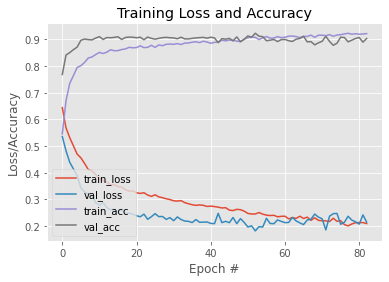

In [16]:
print("[INFO] saving siamese model...")
model.save(config.MODEL_PATH)
# plot the training history
print("[INFO] plotting training history...")
utils.plot_training(history, config.PLOT_PATH)

In [17]:
results = model.evaluate([pairTest[:,0], pairTest[:,1]], labelTest[:]) 
print("test loss, test acc:", results)

59/59 [==============================] - 0s 823us/step - loss: 0.2151 - accuracy: 0.9035
test loss, test acc: [0.21513617038726807, 0.9034994840621948]


In [18]:
results = model.predict([pairTest[:,0], pairTest[:,1]]) 

In [28]:
print(results[1800])

[0.968889]


In [ ]:
pair_1 = pairTest[0,0]
pair_2 = pairTest[0,1]
print(pair_1.shape)

labe_checking = labelTest[0]
print("label is ",labe_checking)

pair_1_dim = np.expand_dims(pair_1, axis = 0)
pair_2_dim = np.expand_dims(pair_2, axis = 0)
print(pair_1_dim.shape)

pair_comb = [pair_1_dim, pair_2_dim]
print(type(pair_comb ))


pred_checking =model.predict(pair_comb)
print(pred_checking[0][0])
#predicting=model.predict()
#0.93839717

In [ ]:
anchors_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\anchors.csv"
test_path = r"E:\nicholas renotte\siamese_handgesture_v5_26_6_22\model\keypoint_classifier\test.csv"
anchors = np.loadtxt(anchors_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
#print(anchors)
testing = np.loadtxt(test_path, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
# import copy 
# print(testing.shape)
# a=copy.deepcopy(testing)
# z=copy.deepcopy(anchors)
# y=z[0,:]
# print("z is ",z.shape)
# print("y is ",y.shape)
# b=np.expand_dims(a, axis = 0)
# x=np.expand_dims(y, axis = 0)
# print("b after expand is ",b.shape)
# print("x after expand is ",x.shape)
# c = [b,x]
# print(type(c))
# print(len(c))
# print(c[0].shape)

In [ ]:
out_preds = []
for anchor in anchors:
    out_preds.append(model.predict([np.expand_dims(anchor, axis = 0), np.expand_dims(testing, axis = 0)]))
    
    #testing = [np.expand_dims(anchor, axis = 0), np.expand_dims(testing, axis = 0)]
    
#     print(type(testing))
#     print(type(anchor))
    
gg= np.argmax(out_preds)
print(out_preds)
print(gg)

In [ ]:

for anchor in anchors:
    
#     print(type(testing))
#     print(type(anchor))
    a= model.predict([np.expand_dims(anchor, axis = 0), np.expand_dims(testing, axis = 0)])
    #print(a)
    print(a[0][0])
    

In [ ]:
with open('model/keypoint_classifier/keypoint_classifier_label.csv',
            encoding='utf-8-sig') as f:
    
    keypoint_classifier_labels = csv.reader(f)
    keypoint_classifier_labels = [
        row[0] for row in keypoint_classifier_labels
    ]
    print(keypoint_classifier_labels)
    
aa =keypoint_classifier_labels[gg]
print(aa)

In [ ]:
print(model.summary())

In [ ]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

In [ ]:

# print(np.array([pairTest[0]]).shape)
print(pairTest[0].shape)

In [ ]:
print(pairTest.shape)
print(pairTest[0,0].shape)
print(pairTest[0,1].shape)
print(pairTest[:2,:].shape)

In [ ]:
print("Input details:", input_details)
print("Input details index:", input_details[0]['index'])

In [ ]:
print("Output details:", output_details)
print("Output details index:", output_details[0]['index'])

In [ ]:
#interpreter.set_tensor(input_details[0]['index'], np.array([pairTest[0,0],pairTest[0,1]]))

In [ ]:
print(pair_1_dim)
print(pair_1_dim.shape)

print(pair_2_dim)
print(pair_2_dim.shape)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], pair_1_dim)
interpreter.set_tensor(input_details[1]['index'], pair_2_dim)

In [ ]:
#interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))
#%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(tflite_results[0][0])
# print(np.squeeze(tflite_results))
# gg =np.argmax(np.squeeze(tflite_results))
# print(gg)

In [ ]:
# model_save_path = "E:/nicholas renotte/siamese_handgesture_v5_26_6_22/output/save_model"
# model.save(model_save_path)
# #model = tf.keras.models.load_model(model_save_path)
# # tensorflow.keras.models.save_model(
# #     model,
# #     model_save_path,
# #     save_format='h5')
    

In [ ]:
# from tensorflow.keras.models import save_model
# save_model(model, "model.h5")

In [ ]:
# model = load_model('model.h5')

In [ ]:
# from tensorflow.keras.models import load_model

In [ ]:
# model =load_model(model_save_path)

In [ ]:

# import tensorflow
# print (tensorflow.__version__)
# from platform import python_version
# print(python_version())